<a href="https://colab.research.google.com/github/rennanvra/Praktikum-IPSD/blob/main/MODUL%204/Tugas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Diberikan data test untuk kasus unguided praktikum minggu ini, lakukan identifikasi pada data tersebut apakah terdapat perbedaan karakteristik data train pada praktikum sebelumnya.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from imblearn.over_sampling import SMOTE

### Load data

In [4]:
# load data
data_train = pd.read_csv('train_features.csv')
data_test = pd.read_csv('test_features.csv')
data = pd.concat([data_train, data_test], axis = 1)
data.head(5)

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,...,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979.0,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,...,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,1950.0,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,...,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1966.0,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,...,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,1961.0,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,...,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,1970.0,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,...,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [45]:
data_merge = pd.merge(data_train, data_test, how='outer')
data_merge.head(5)

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,ID
0,1892,SMA,Sendiri,116185000.0,0.0,1.0,28.0,0.0,14161.0,24276.0,0.0,3.0,1.0,2.0,0.0,2014-05-17,239.0
1,1899,Doktor,Rencana Menikah,169720000.0,0.0,0.0,41.0,291312.0,1145018.0,200277.0,119357.0,3.0,4.0,4.0,0.0,2013-09-28,NaN
2,1900,Magister,Sendiri,169786609.0,0.0,0.0,41.0,288071.0,1145589.0,198534.0,120718.0,3.0,4.0,4.0,0.0,NaN,NaN
3,1902,Doktor,Rencana Menikah,169668686.0,0.0,0.0,40.0,277813.0,1106672.0,193109.0,115176.0,2.0,4.0,4.0,0.0,NaN,NaN
4,1902,Doktor,Rencana Menikah,169758432.0,0.0,0.0,42.0,287300.0,NaN,197507.0,121649.0,3.0,NaN,4.0,0.0,NaN,NaN


In [22]:
from google.colab import files

# Menyimpan hasil gabungan ke file CSV
data.to_csv('train_test.csv', index=False)


# Mengunduh file hasil menggabung dua data
files.download('train_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   float64
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [50]:
# Memilih dan Menampilkan Kolom Non-Numerik
data[data.select_dtypes(exclude=['number']).columns]

,pendidikan,pendidikan,status_pernikahan,status_pernikahan,tanggal_menjadi_anggota,tanggal_menjadi_anggota,pendidikan,pendidikan,status_pernikahan,status_pernikahan,tanggal_menjadi_anggota,tanggal_menjadi_anggota
0,Sarjana,Sarjana,Rencana Menikah,NaN,2014-05-05,NaN,Sarjana,Sarjana,Rencana Menikah,NaN,2014-05-05,NaN
1,Sarjana,Doktor,Rencana Menikah,Menikah,2013-03-17,NaN,Sarjana,Doktor,Rencana Menikah,Menikah,2013-03-17,NaN
2,Sarjana,SMA,Menikah,Menikah,NaN,2013-08-06,Sarjana,SMA,Menikah,Menikah,NaN,2013-08-06
3,Magister,Doktor,Rencana Menikah,Menikah,NaN,NaN,Magister,Doktor,Rencana Menikah,Menikah,NaN,NaN
4,Sarjana,Sarjana,Rencana Menikah,Rencana Menikah,NaN,NaN,Sarjana,Sarjana,Rencana Menikah,Rencana Menikah,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3813,Doktor,Magister,Rencana Menikah,Sendiri,2014-06-09,2014-03-17,Doktor,Magister,Rencana Menikah,Sendiri,2014-06-09,2014-03-17
3814,Magister,Sarjana,Menikah,Menikah,2013-11-07,NaN,Magister,Sarjana,Menikah,Menikah,2013-11-07,NaN
3815,SMA,Magister,Rencana Menikah,Rencana Menikah,2013-06-30,NaN,SMA,Magister,Rencana Menikah,Rencana Menikah,2013-06-30,NaN
3816,Sarjana,Sarjana,Menikah,Rencana Menikah,2014-01-25,2014-01-20,Sarjana,Sarjana,Menikah,Rencana Menikah,2014-01-25,2014-01-20


In [49]:
# Menampilkan Setiap Kolom
data_merge.columns

Index(['tahun_kelahiran', 'pendidikan', 'status_pernikahan', 'pendapatan',
       'jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja',
       'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue',
       'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan',
       'tanggal_menjadi_anggota', 'ID'],
      dtype='object')

In [19]:
# Untuk mnegetahui nilai mean, std, min, dll...
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tahun_kelahiran,3817.0,1.967824e+03,1.176813e+01,1899.0,1959.00,1968.0,1.976000e+03,2.000000e+03
pendapatan,3627.0,1.144832e+08,4.346042e+07,5073000.0,81125122.00,115621394.0,1.504960e+08,3.328840e+08
jumlah_anak_balita,3627.0,2.930797e-01,4.730627e-01,0.0,0.00,0.0,1.000000e+00,2.000000e+00
jumlah_anak_remaja,3613.0,3.537227e-01,4.930139e-01,0.0,0.00,0.0,1.000000e+00,2.000000e+00
terakhir_belanja,3645.0,4.723155e+01,2.706851e+01,0.0,25.00,47.0,6.900000e+01,1.280000e+02
belanja_buah,3636.0,5.980424e+04,7.402498e+04,0.0,7907.00,26456.0,8.616200e+04,3.965080e+05
belanja_daging,3639.0,4.385748e+05,5.120427e+05,0.0,49479.50,221993.0,6.863555e+05,3.489675e+06
belanja_ikan,3624.0,8.142900e+04,9.997623e+04,0.0,10115.00,36054.5,1.213800e+05,6.216000e+05
belanja_kue,3603.0,6.337797e+04,7.943546e+04,0.0,7947.00,27795.0,8.950250e+04,5.421640e+05
pembelian_diskon,3639.0,2.125584e+00,2.100133e+00,0.0,0.00,2.0,3.000000e+00,2.000000e+01


Tabel di atas memberikan informasi mengenai nilai mean, standar deviasi, nilai minimal, Quartile 1 atau 25% data terbawah, Quartile 2 atau 50% data terbawah, Quartile 3 atau 25% data teratas, dan nilai maksimal pada setaip index pada dataset gabungan antara test_features dan train_features.

In [34]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3818.0,3.841507e+03,2.198401e+03,2.0,1950.75,3872.5,5.770750e+03,7.634000e+03
tahun_kelahiran,3818.0,1.967790e+03,1.180857e+01,1892.0,1959.00,1968.0,1.976000e+03,2.009000e+03
pendapatan,3615.0,1.163249e+08,5.105122e+07,2998899.0,81681624.00,117732079.0,1.506877e+08,1.305740e+09
jumlah_anak_balita,3609.0,2.829039e-01,4.650046e-01,0.0,0.00,0.0,1.000000e+00,2.000000e+00
jumlah_anak_remaja,3608.0,3.553215e-01,4.968651e-01,0.0,0.00,0.0,1.000000e+00,2.000000e+00
terakhir_belanja,3617.0,4.718137e+01,2.694029e+01,0.0,25.00,46.0,6.800000e+01,1.330000e+02
belanja_buah,3632.0,6.123408e+04,7.664759e+04,0.0,7497.50,29525.0,8.677675e+04,4.086460e+05
belanja_daging,3623.0,4.528484e+05,5.123206e+05,0.0,54621.00,232753.0,7.217960e+05,3.271191e+06
belanja_ikan,3622.0,8.533861e+04,1.037895e+05,0.0,10115.00,40025.5,1.296568e+05,5.749320e+05
belanja_kue,3631.0,6.380151e+04,7.842854e+04,0.0,8092.00,29251.0,9.140700e+04,5.320490e+05


In [35]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
tahun_kelahiran,3817.0,1.967824e+03,1.176813e+01,1899.0,1959.0,1968.0,1976.0,2000.0
pendapatan,3627.0,1.144832e+08,4.346042e+07,5073000.0,81125122.0,115621394.0,150495956.0,332884000.0
jumlah_anak_balita,3627.0,2.930797e-01,4.730627e-01,0.0,0.0,0.0,1.0,2.0
jumlah_anak_remaja,3613.0,3.537227e-01,4.930139e-01,0.0,0.0,0.0,1.0,2.0
terakhir_belanja,3645.0,4.723155e+01,2.706851e+01,0.0,25.0,47.0,69.0,128.0
belanja_buah,3636.0,5.980424e+04,7.402498e+04,0.0,7907.0,26456.0,86162.0,396508.0
belanja_daging,3639.0,4.385748e+05,5.120427e+05,0.0,49479.5,221993.0,686355.5,3489675.0
belanja_ikan,3624.0,8.142900e+04,9.997623e+04,0.0,10115.0,36054.5,121380.0,621600.0
belanja_kue,3603.0,6.337797e+04,7.943546e+04,0.0,7947.0,27795.0,89502.5,542164.0
pembelian_diskon,3639.0,2.125584e+00,2.100133e+00,0.0,0.0,2.0,3.0,20.0


## EDA

## Load data

In [27]:
test_data = pd.read_csv('test_features.csv')
train_data = pd.read_csv('train_features.csv')

## Histogram

### Histogram Tahun Kelahiran

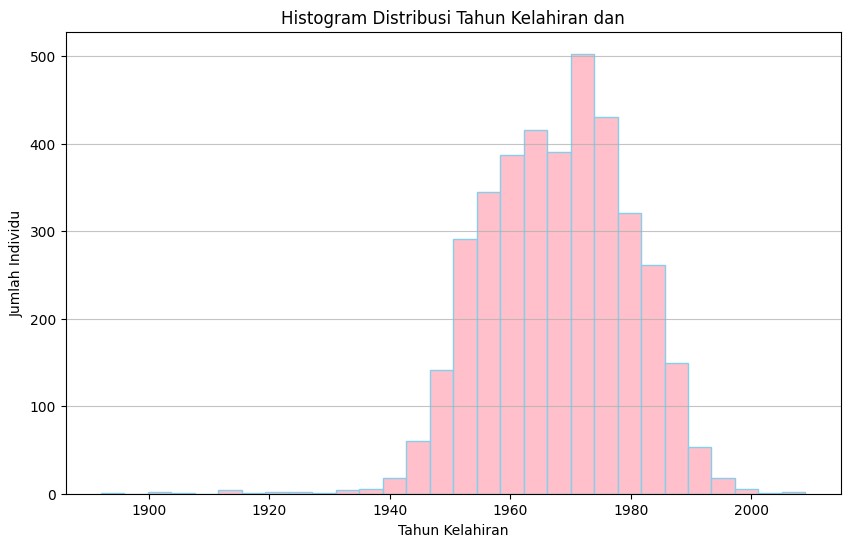

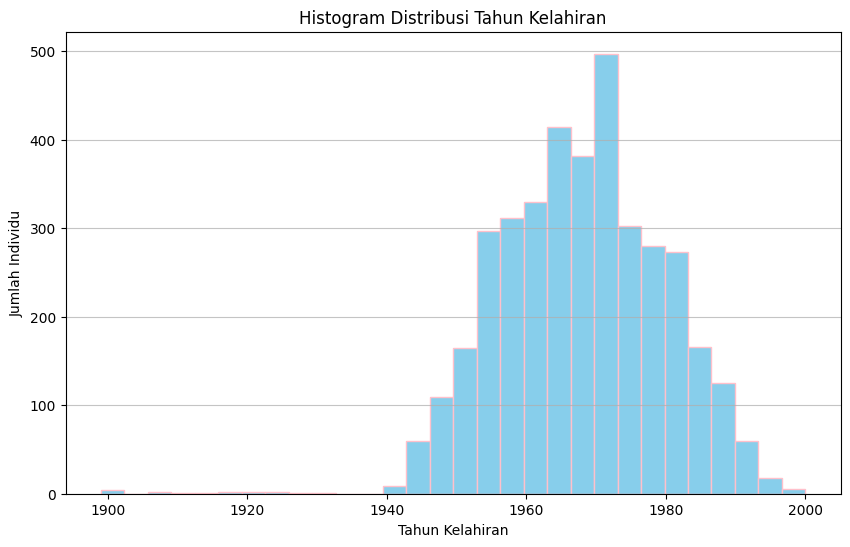

In [100]:
# Histogram Distribusi Data 1 test features "Tahun Kelahiran"
plt.figure(figsize=(10, 6))
plt.hist(test_data['tahun_kelahiran'].dropna(), bins=30, color= 'pink', edgecolor='skyblue')

plt.title('Histogram Distribusi Tahun Kelahiran dan')
plt.xlabel('Tahun Kelahiran')
plt.ylabel('Jumlah Individu')

plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogram Distribusi Data 2 train features "Tahun Kelahiran"
plt.figure(figsize=(10, 6))
plt.hist(train_data['tahun_kelahiran'].dropna(), bins=30, color= 'skyblue', edgecolor='pink')

plt.title('Histogram Distribusi Tahun Kelahiran')
plt.xlabel('Tahun Kelahiran')
plt.ylabel('Jumlah Individu')

plt.grid(axis='y', alpha=0.75)
plt.show()

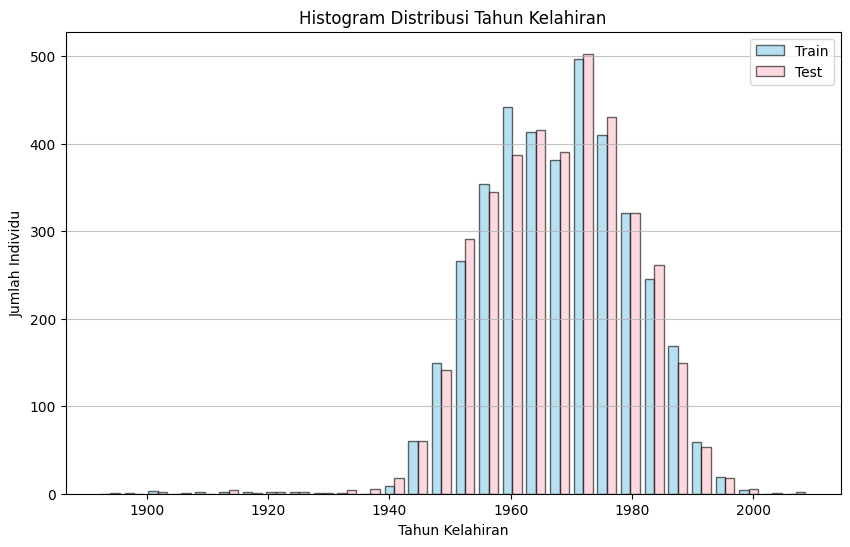

In [101]:
# Membuat histogram bertumpuk
plt.figure(figsize=(10, 6))
plt.hist([train_data['tahun_kelahiran'].dropna(), test_data['tahun_kelahiran'].dropna()],
         bins=30,
         color=['skyblue', 'pink'],
         edgecolor='black',
         alpha=0.6,
         label=['Train', 'Test'])

plt.title('Histogram Distribusi Tahun Kelahiran')
plt.xlabel('Tahun Kelahiran')
plt.ylabel('Jumlah Individu')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Interpretasi

Pada histogram di atas dapat di lihat bahwa distribusi data tahun kelahiran pada dataset Train dan dataset Test memiliki pola yang mirip yang berarti memiliki perbedaan yang tidak terlalu signifikan. Puncak atau nilai tertinggi pada dua dataset di atas sama-sama berada di Tahun 1970-an. Dari informasi di atas dapat disimpulkan bahwa individu dalam dataset memiliki umur yang hampir setara atau hidup dalam zaman yang hampir sama, sehingga dapat menunjang proses analisis.

### Histogram hubungan antara Jumlah Anak dan Tahun Kelahiran

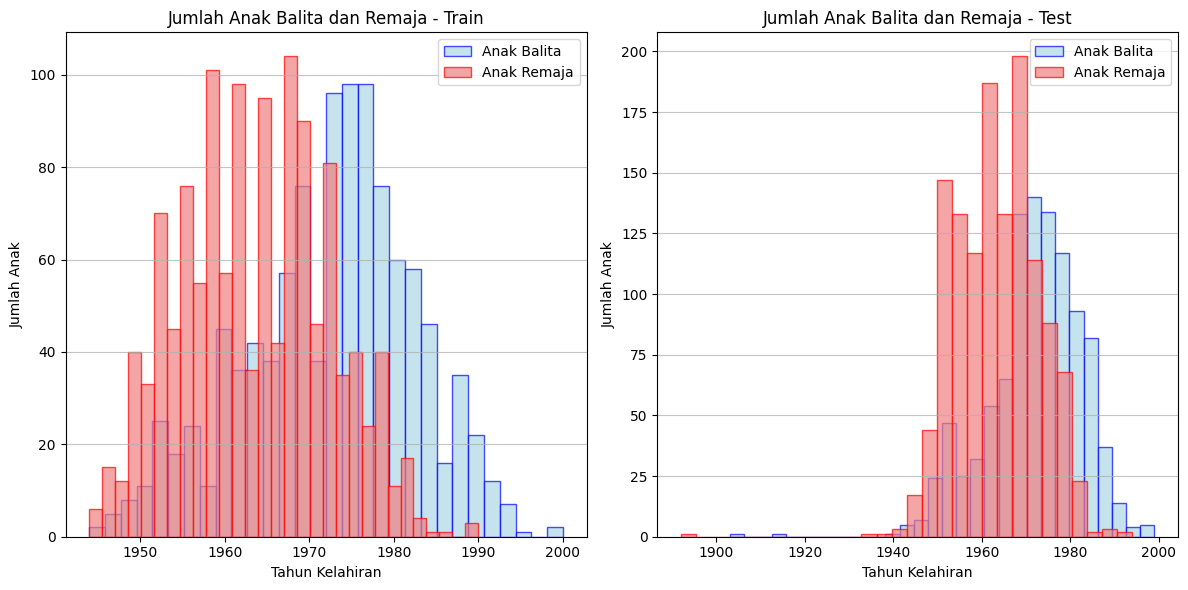

In [97]:
# Memuat data
train_data = pd.read_csv('train_features.csv')
test_data = pd.read_csv('test_features.csv')

# Menghitung total jumlah anak (balita + remaja)
train_data['total_anak'] = train_data['jumlah_anak_balita'] + train_data['jumlah_anak_remaja']
test_data['total_anak'] = test_data['jumlah_anak_balita'] + test_data['jumlah_anak_remaja']

# Membuat histogram untuk dataset train
plt.figure(figsize=(12, 6))

# Histogram untuk jumlah anak balita pada dataset train
plt.subplot(1, 2, 1)
plt.hist(train_data['tahun_kelahiran'][train_data['jumlah_anak_balita'] > 0],
         weights=train_data['jumlah_anak_balita'][train_data['jumlah_anak_balita'] > 0],
         bins=30, color='lightblue', edgecolor='blue', alpha=0.7, label='Anak Balita')
plt.hist(train_data['tahun_kelahiran'][train_data['jumlah_anak_remaja'] > 0],
         weights=train_data['jumlah_anak_remaja'][train_data['jumlah_anak_remaja'] > 0],
         bins=30, color='lightcoral', edgecolor='red', alpha=0.7, label='Anak Remaja')
plt.title('Jumlah Anak Balita dan Remaja - Train')
plt.xlabel('Tahun Kelahiran')
plt.ylabel('Jumlah Anak')
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Membuat histogram untuk dataset test
plt.subplot(1, 2, 2)
plt.hist(test_data['tahun_kelahiran'][test_data['jumlah_anak_balita'] > 0],
         weights=test_data['jumlah_anak_balita'][test_data['jumlah_anak_balita'] > 0],
         bins=30, color='lightblue', edgecolor='blue', alpha=0.7, label='Anak Balita')
plt.hist(test_data['tahun_kelahiran'][test_data['jumlah_anak_remaja'] > 0],
         weights=test_data['jumlah_anak_remaja'][test_data['jumlah_anak_remaja'] > 0],
         bins=30, color='lightcoral', edgecolor='red', alpha=0.7, label='Anak Remaja')
plt.title('Jumlah Anak Balita dan Remaja - Test')
plt.xlabel('Tahun Kelahiran')
plt.ylabel('Jumlah Anak')
plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

#### Interpretasi

Histogram di atas menunjukan jumlah anak balita dan remaja berdasarkan tahun kelahiran pada dataset Train dan Test. Pada dataset Train dapat dilihat bahwa jumlah anak balita dan remaja paling banyak lahir pada tahun 1960-an dan jumlahnya menurun secara bertahap hingga tahun 2000-an. Pada datset Test dapat dilihat bahwa jumlah anak balita dan remaja paling banyak lahir pada tahun 1960-an juga dan jumlahnya menurun secara bertahap hingga tahun 2000-an.

Pola distribusi pada kedua dataset tersebut memiliki perbedaan yang hampir signifikan, dimana pada dataset Train data lebih menyebar daripada dataset Test. Namun, rentang data pada datset Train lebih sedikit daripada dataset Test.

## Bar Chart

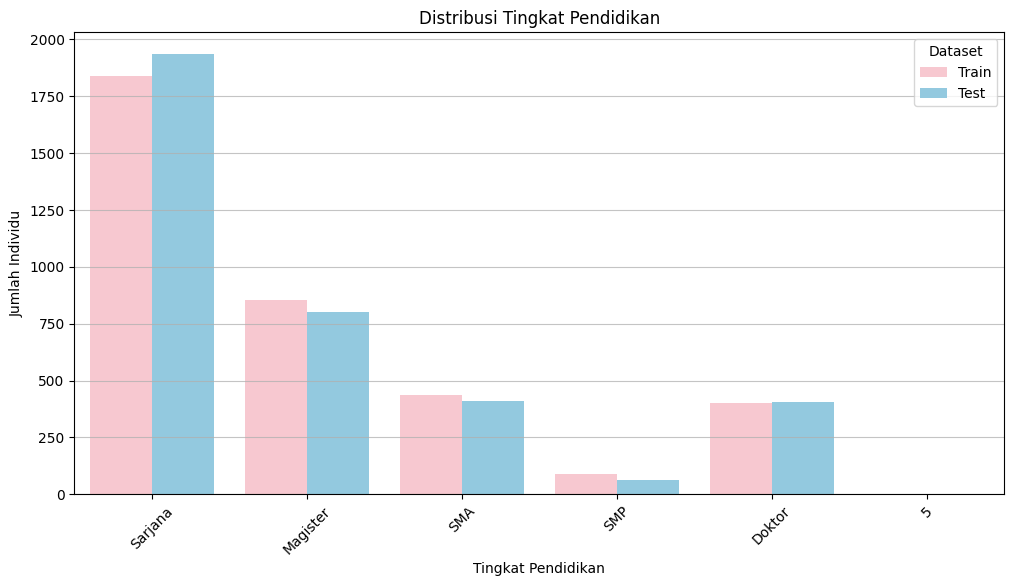

In [78]:
# Mengatur ukuran grafik
plt.figure(figsize=(12, 6))

# Bar plot untuk distribusi pendidikan
sns.countplot(data=data, x='pendidikan', hue='dataset', palette={'Train': 'pink', 'Test': 'skyblue'})

# Menambahkan label pada grafik
plt.title('Distribusi Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Individu')
plt.xticks(rotation=45)  # Memutar label sumbu X jika diperlukan
plt.legend(title='Dataset')
plt.grid(axis='y', alpha=0.75)


#### Interpretasi

Bar chart di atas menampilkan distribusi tingkat pendidikan pada dua dataset yaitu dataset Train dan dataset Test.

Distribusi tingkat pendidikan di kedua dataset tidak memiliki perbedaan yang signifikan, sehingga kedua dataset di atas memiliki karakteristik yang mirip. Kedua dataset di atas memiliki jumlah individu paling banyak ada pada tingkat pendidikan Sarjana, kemudian Magister, dan SMA. Jumlah individu pada tingkat pendidikan SMP dan Doktor relatif sedikit.

## Pie Chart

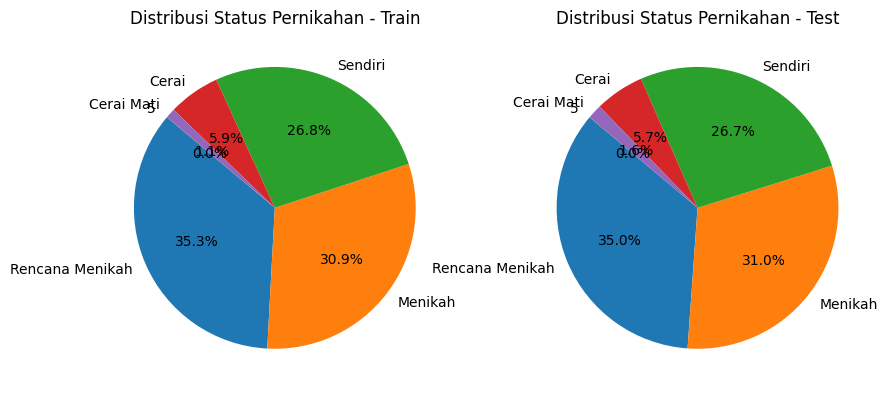

In [65]:
# Menghitung proporsi
train_status = train_data['status_pernikahan'].value_counts()
test_status = test_data['status_pernikahan'].value_counts()

# Pie chart untuk Train
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(train_status, labels=train_status.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Status Pernikahan - Train')

# Pie chart untuk Test
plt.subplot(1, 2, 2)
plt.pie(test_status, labels=test_status.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Status Pernikahan - Test')

plt.show()

#### Interpretasi

Pie Chart di atas menunjukan distribusi status pernikahan yang hampir sama antara dataset Train dan dataset Test. Mayoritas responden telah menikah (30.9% untuk dataset Train dan 31.0% untuk dataset Test), lalu ada Rencana menikah (35.3% untuk dataset Train dan 35.0% untuk dataset Test). Responden yang masih single ada 26.8% untuk dataset Train dan 26.7% untuk dataset Test, begitu pula dengan responden yang telah cerai pada dataset Train ada 5.9% dan 5.7% untuk dataset Test. Responden yang telah bercerai mati sangat kecil, yaitu 0% di data Train dan 0.6% di data Test.

Dapat disimpulkan bahwa kedua pie chart menunjukkan karakteristik status pernikahan yang mirip antara dataset Train dan dataset Test.

## Scatterplot

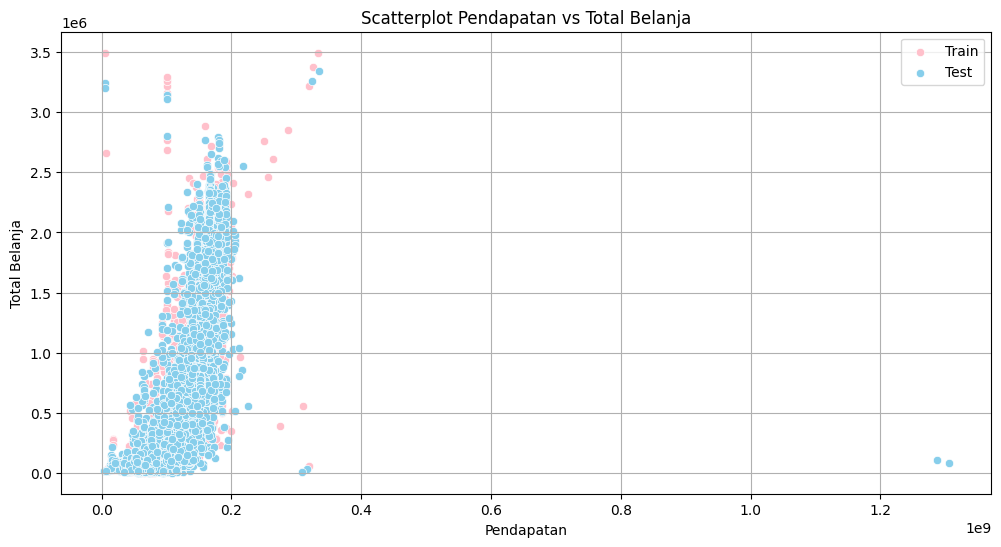

In [69]:
# Menghitung total belanja untuk train dan test
train_data['total_belanja'] = train_data[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].sum(axis=1)
test_data['total_belanja'] = test_data[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].sum(axis=1)

# Mengatur ukuran grafik
plt.figure(figsize=(12, 6))

# Scatterplot untuk Train
sns.scatterplot(data=train_data, x='pendapatan', y='total_belanja', color='pink', label='Train')

# Scatterplot untuk Test
sns.scatterplot(data=test_data, x='pendapatan', y='total_belanja', color='skyblue', label='Test')

# Menambahkan label pada grafik
plt.title('Scatterplot Pendapatan vs Total Belanja')
plt.xlabel('Pendapatan')
plt.ylabel('Total Belanja')
plt.legend()
plt.grid()
plt.show()

#### Interpretasi

Grafik scatterplot di atas menunjukkan bahwa ada hubungan positif antara pendapatan dan total belanja di kedua dataset. Artinya, semakin besar pendapatan seseorang, biasanya semakin besar juga pengeluarannya. Namun, ada beberapa outlier yang bisa di lihat pada scatterplot di atas, yaitu mungkin saja individu yang memiliki pendapatan sangat tinggi tapi belanjanya rendah. Ini mungkin karena mereka lebih banyak menabung atau baru mulai mendapatkan penghasilan besar dan belum menggunakannya.

Perbedaan karakteristik antara data Train dan data Test dapat dilihat dari distribusi titik-titik pada grafik. Data Train cenderung terdistribusi lebih padat di bagian bawah grafik, sedangkan data Test lebih tersebar merata. Hal ini menunjukkan bahwa individu yang ada pada data Train mungkin kurang mampu memprediksi total belanja untuk individu dengan pendapatan tinggi.


## Heatmap

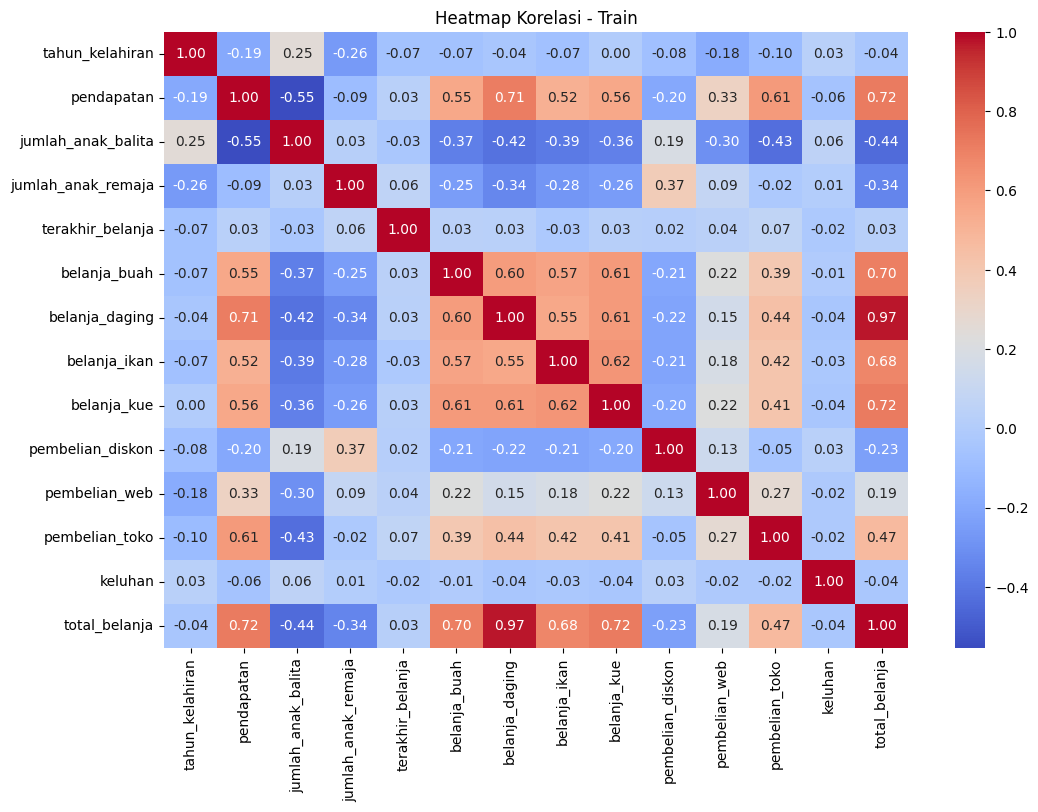

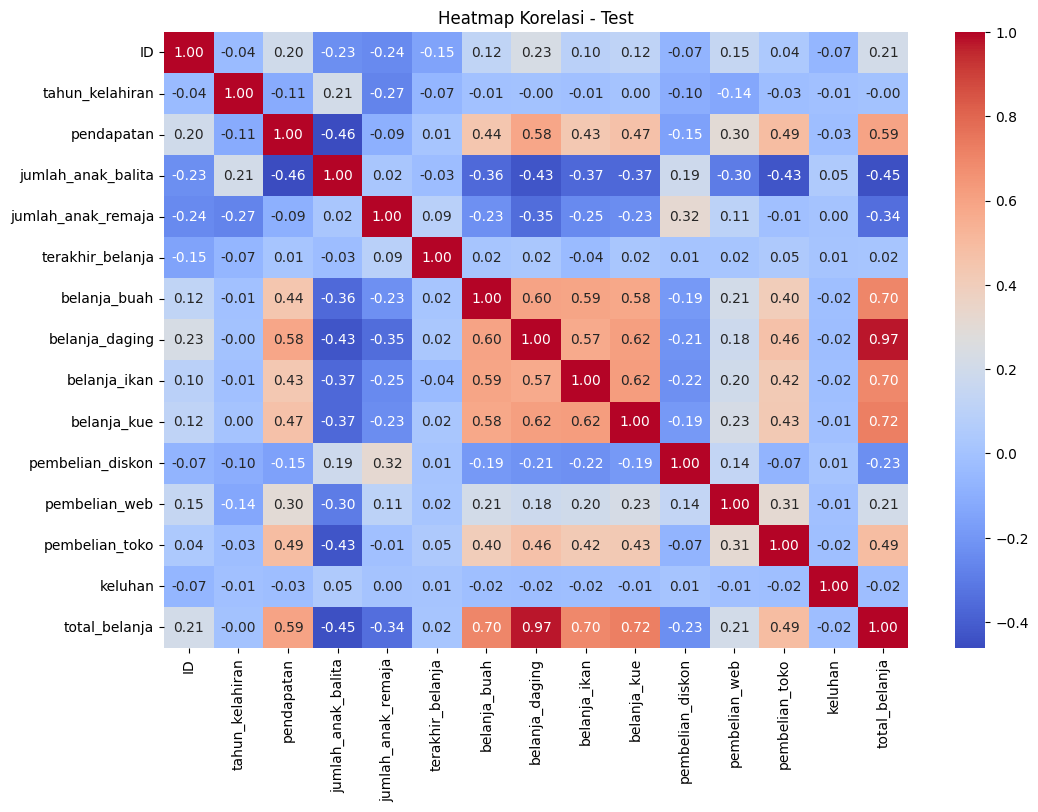

In [71]:
# Memilih hanya Numerik
numerical_features = train_data.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 8))
sns.heatmap(train_data[numerical_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap Korelasi - Train')
plt.show()

# Memilih hanya Numerik
numerical_features = test_data.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 8))
sns.heatmap(test_data[numerical_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap Korelasi - Test')
plt.show()

#### Interpretasi


Pada heatmap diatas dapat dilihat hubungan antara variabel-variabel saling berkaitan melalui warna dan angka yang muncul. Warna-warna pada heatmap menggambarkan arah dan seberapa kuat hubungan tersebut. Warna merah menunjukkan korelasi positif yang kuat, warna biru menandakan korelasi negatif yang kuat, sementara warna putih atau kuning menandakan korelasi yang lemah.

Selain itu, angka-angka di heatmap memberikan informasi lebih lanjut tentang besarnya koefisien korelasi. Nilai positif yang mendekati 1 berarti ada korelasi positif yang kuat, sedangkan nilai negatif mendekati -1 menunjukkan korelasi negatif yang kuat. Jika nilainya mendekati 0, berarti hubungannya lemah.

Berdasarkan heatmap di atas, terdapat perbedaan karakteristik antara dataset train dan test. Pada dataset train memiliki korelasi yang lebih kuat antar variabel dibandingkan dataset test.

Pada dataset train, terdapat beberapa korelasi yang cukup kuat, seperti antara "total_belanja" dengan "belanja_buah" dan "belanja_daging". Sementara dataset test memperlihatkan pola korelasi yang lebih lemah dan tersebar.

## Pairplot

<Figure size 1200x1000 with 0 Axes>

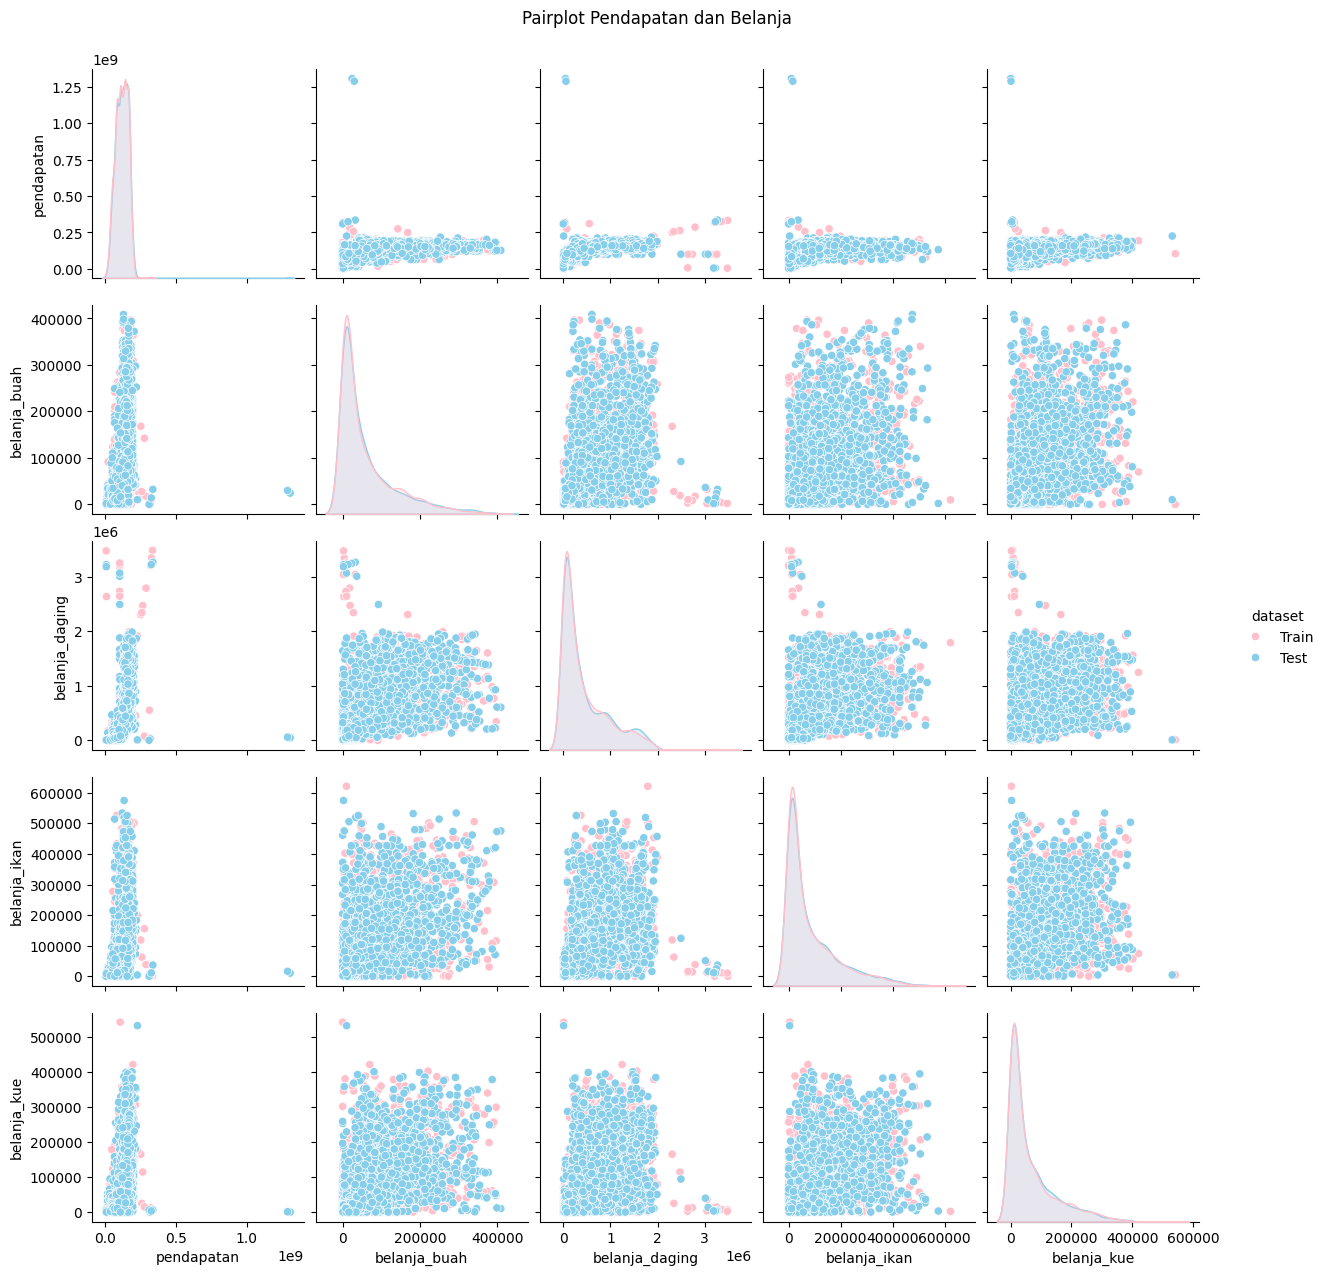

In [74]:
# Add a 'dataset' column to distinguish between Train and Test data
train_data['dataset'] = 'Train'
test_data['dataset'] = 'Test'

# Menggabung 2 data
data = pd.concat([train_data, test_data], ignore_index=True)

# Mengatur ukuran grafik
plt.figure(figsize=(12, 10))

# Membuat pairplot untuk fitur numerik
sns.pairplot(data, hue='dataset', vars=['pendapatan', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue'],
             palette={'Train': 'pink', 'Test': 'skyblue'})

plt.suptitle('Pairplot Pendapatan dan Belanja', y=1.02)
plt.show()

#### Interpretasi

Pairplot di atas menunjukkan perbedaan karakteristik data antara dataset train dan test, terutama pada variabel pendapatan dan belanja.

Dataset train memiliki rentang nilai yang lebih luas dengan beberapa outlier pada variabel pendapatan, sementara dataset test cenderung lebih terpusat dan simetris. Untuk variabel belanja, dataset train menunjukkan pola yang lebih menyebar dan beragam, sedangkan dataset test memiliki distribusi yang lebih terpusat dan homogen.

# Uji Kolmogorov-Smirnov

## Hipotesis

H₀ (Hipotesis Nol): Tidak ada perbedaan signifikan dalam distribusi antara variabel data train dan test (distribusi kedua dataset sama).

H₁ (Hipotesis Alternatif): Ada perbedaan signifikan dalam distribusi antara variabel data train dan test (distribusi kedua dataset berbeda).

Titik Kritis dan Level Signifikansi

Pada uji Kolmogorov-Smirnov, p-value digunakan untuk menentukan apakah kita menolak atau gagal menolak hipotesis nol. Jika p-value lebih kecil dari level signifikansi yang ditetapkan (misalnya α = 0.05), kita menolak H₀.

Level Signifikansi (α): 0.05

Titik Kritis:

Jika p-value < 0.05, maka H₀ ditolak dan distribusi antara train dan test dianggap berbeda secara signifikan.
Jika p-value ≥ 0.05, kita gagal menolak H₀, artinya distribusi antara train dan test dianggap sama.

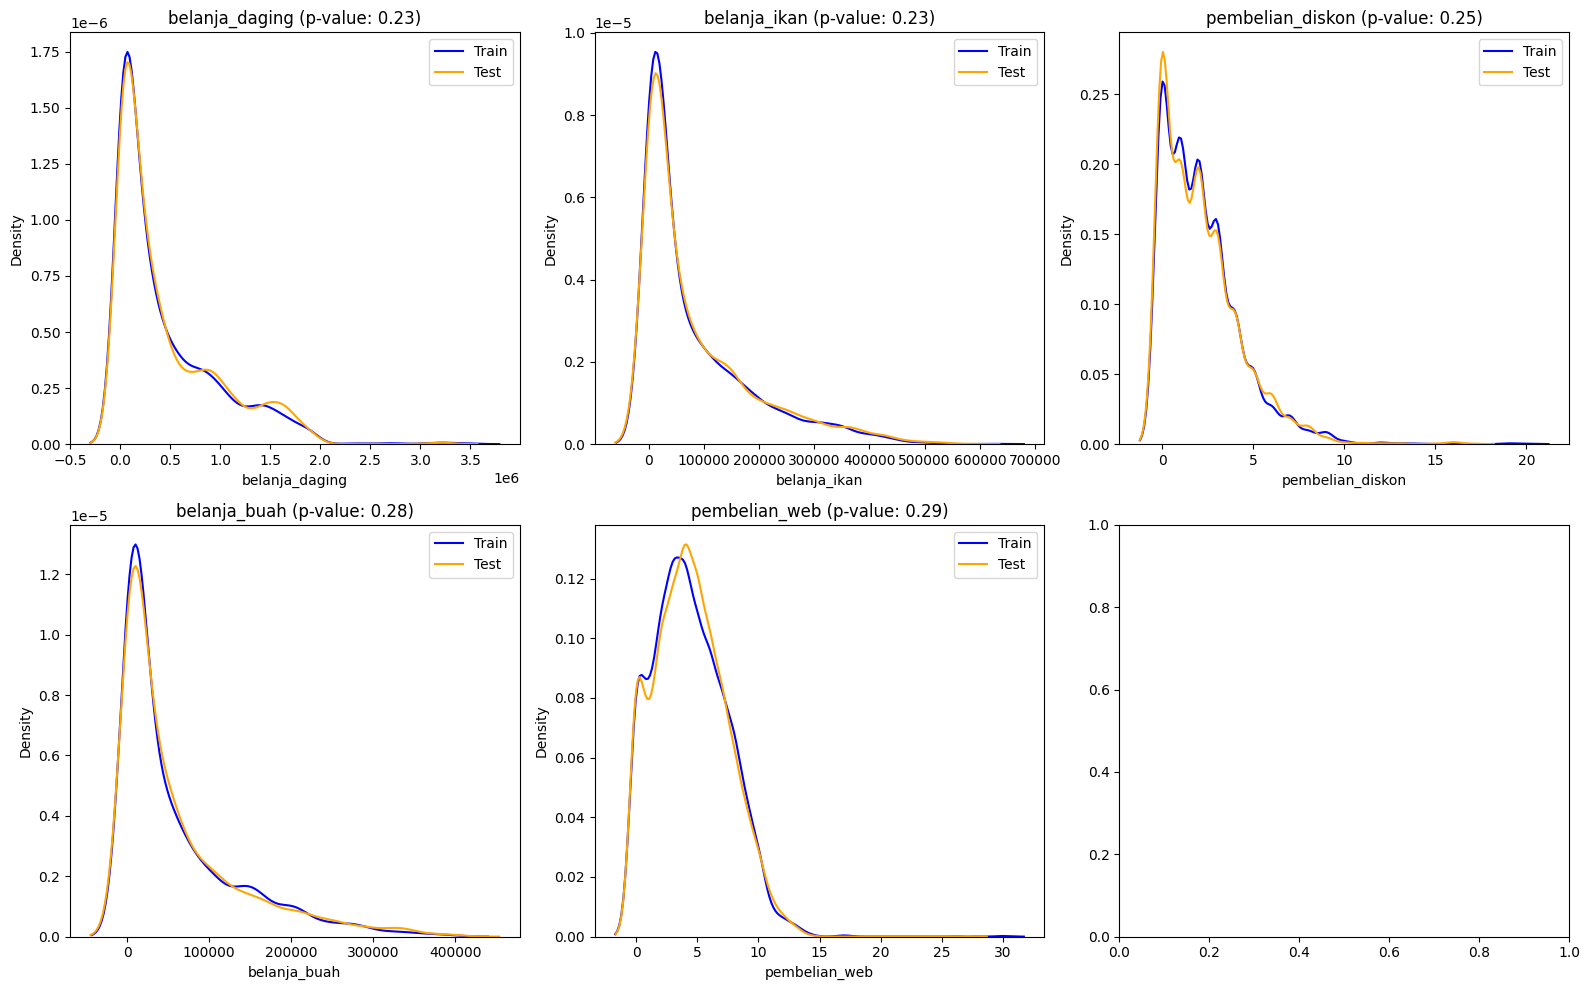

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Pilih variabel numerik untuk uji Kolmogorov-Smirnov
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Lakukan uji Kolmogorov-Smirnov untuk setiap variabel numerik
ks_test_results = {}
for column in numerical_columns:
    ks_stat, p_value = ks_2samp(train_data[column].dropna(), test_data[column].dropna())
    ks_test_results[column] = {'KS Statistic': ks_stat, 'p-value': p_value}

# Buat DataFrame hasil uji Kolmogorov-Smirnov
ks_results_df = pd.DataFrame(ks_test_results).T

# Pilih 5 variabel dengan p-value terkecil
lowest_p_values = ks_results_df.nsmallest(5, 'p-value')

# Buat visualisasi distribusi untuk 5 variabel tersebut
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
axes = axes.ravel()

for i, column in enumerate(lowest_p_values.index):
    sns.kdeplot(train_data[column], ax=axes[i], color='blue', label='Train')
    sns.kdeplot(test_data[column], ax=axes[i], color='orange', label='Test')
    axes[i].set_title(f"{column} (p-value: {ks_results_df.loc[column, 'p-value']:.2f})")
    axes[i].legend()

plt.tight_layout()
plt.show()

#### Interpretasi

Dari hasil uji Kolmogorov-Smirnov, H0 diterima karena semua p-value untuk setiap variabel berada di atas level signifikansi 0.05.

Yang berarti berdasarkan hasil uji, tidak ada perbedaan distribusi yang signifikan antara data train dan test. Ini menunjukkan bahwa kedua dataset memiliki karakteristik distribusi yang serupa.

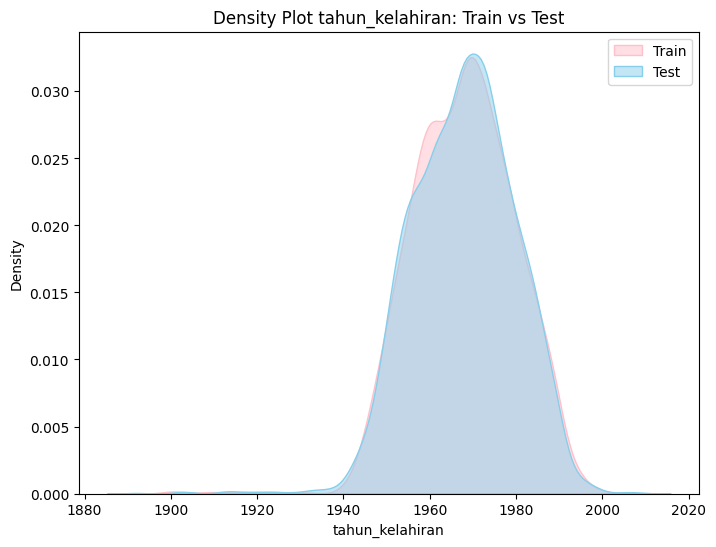

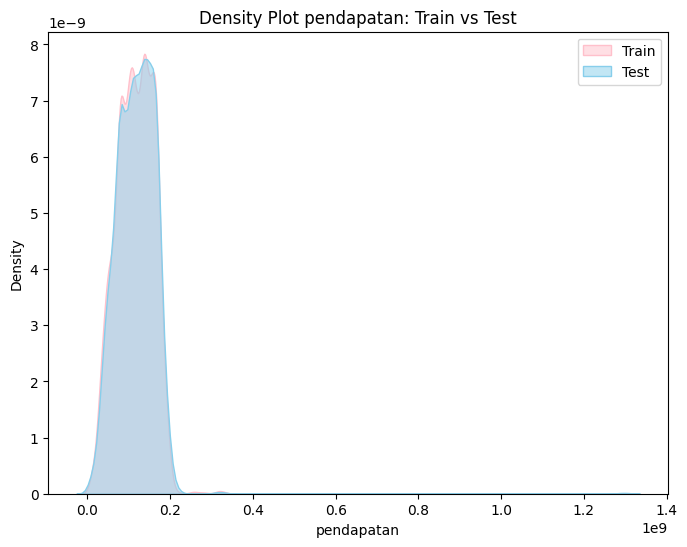

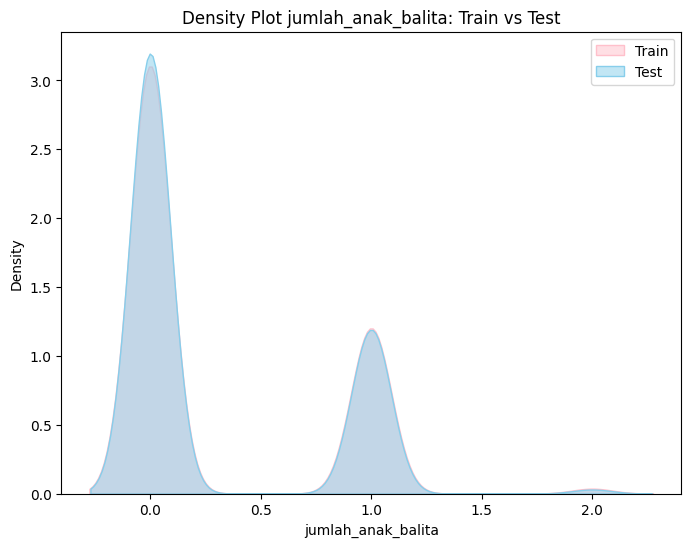

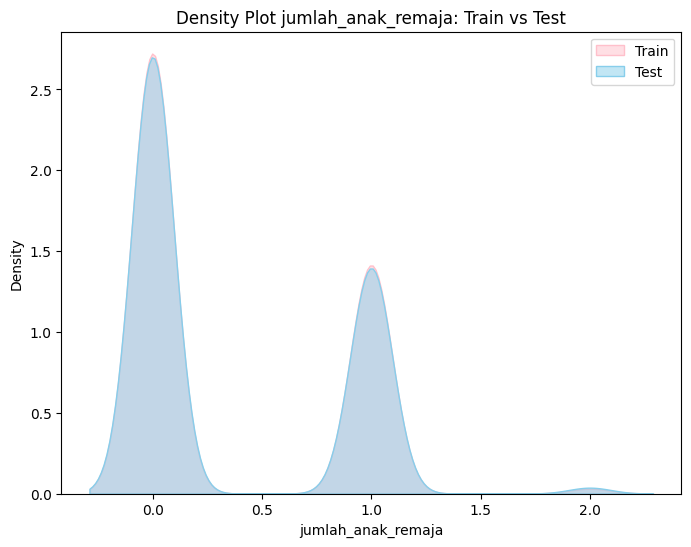

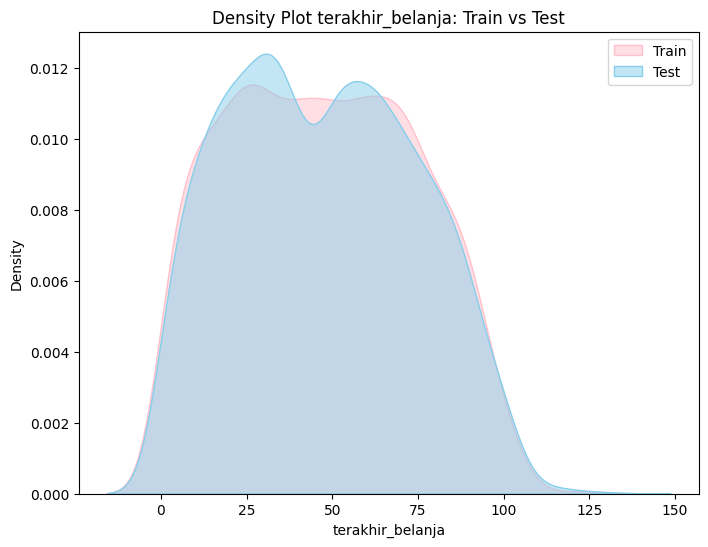

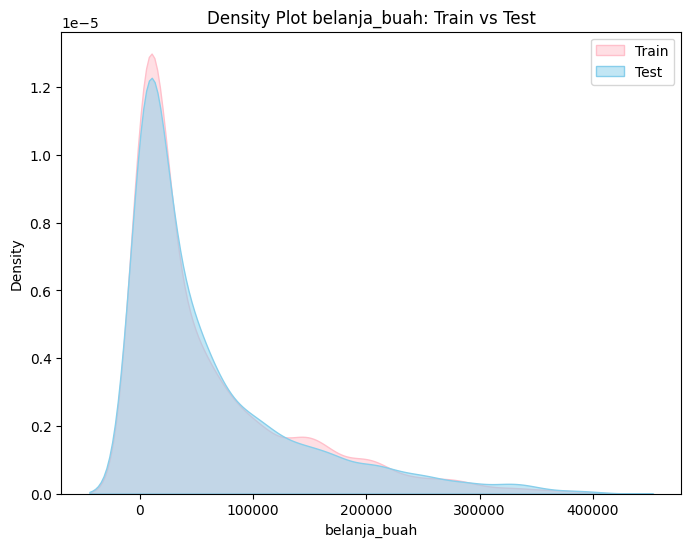

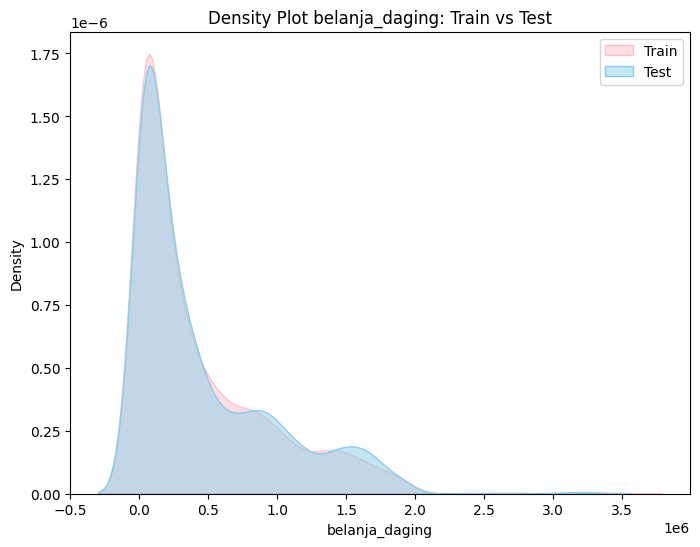

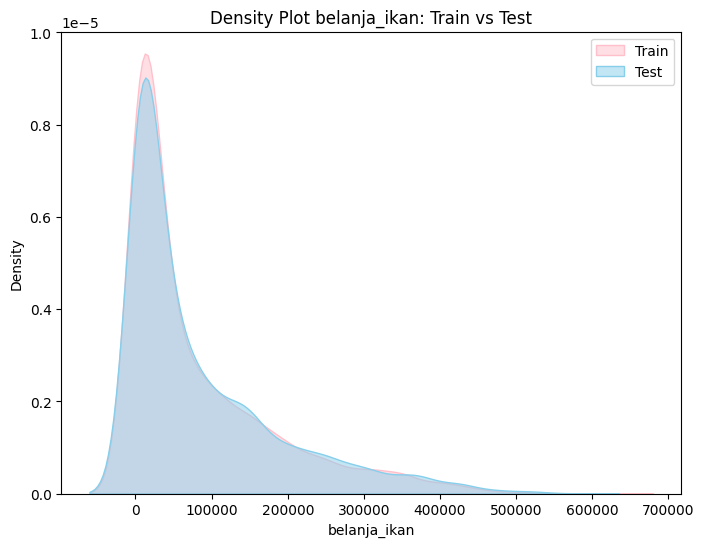

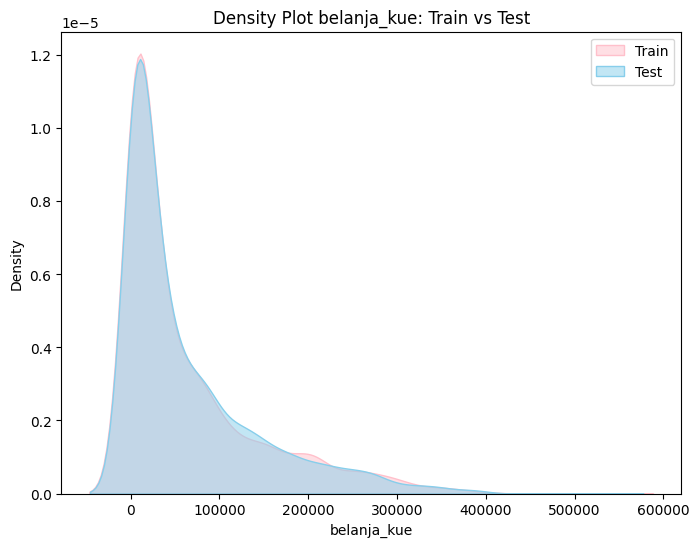

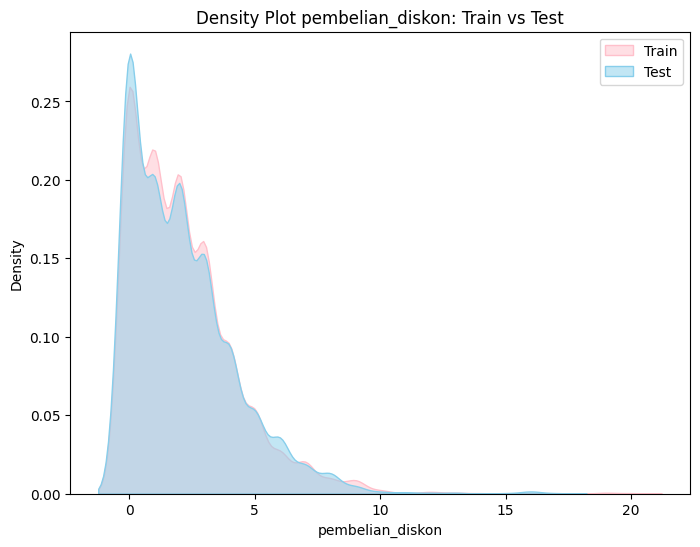

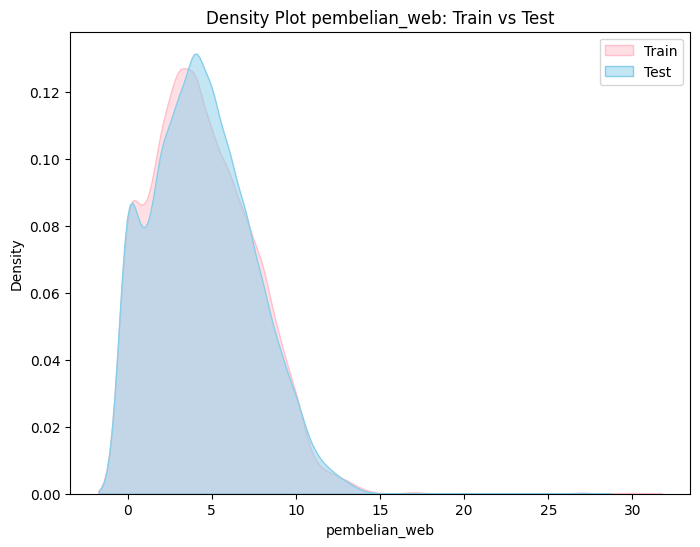

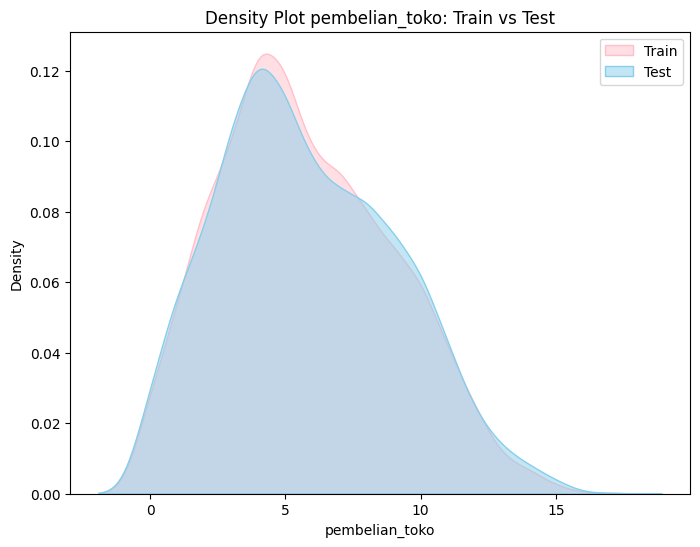

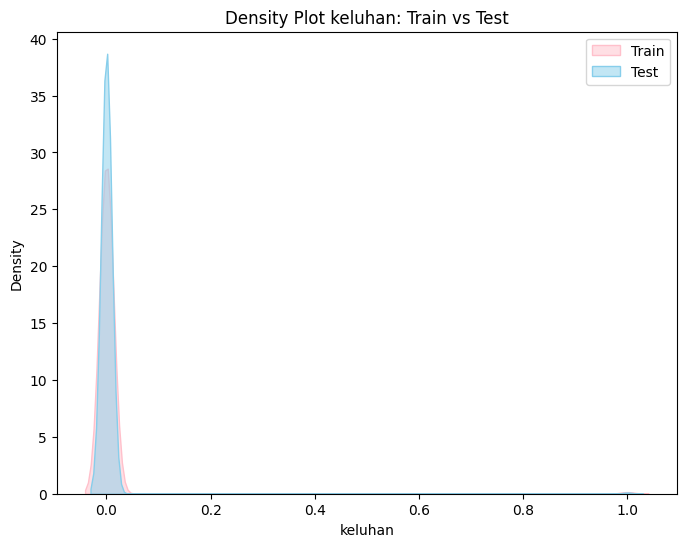

In [107]:
sns.set_palette("Set2")
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(train_data[column].dropna(), color='pink', label='Train', fill=True, alpha=0.5)
    sns.kdeplot(test_data[column].dropna(), color='skyblue', label='Test', fill=True, alpha=0.5)
    plt.legend()
    plt.title(f'Density Plot {column}: Train vs Test')
    plt.show()

#### Interpretasi

Berdasarkan analisis densitas data untuk setiap variabel di data train dan test, ditemukan bahwa pola densitasnya hampir sama. Hasil ini konsisten dengan analisis sebelumnya yang menunjukkan bahwa tidak ada perbedaan karakteristik yang signifikan antara data train dan test.

## Kesimpulan

**Terdapat perbedaan karakteristik pada kedua dataset di atas, namun tidak signfikan** Bahkan masih dapat dikatakan memiliki karakteristik yang hampir sama atau setara.